## __Lab-5 Assignment__
## __Balbhadra Prajapati__ 8873745

### *Goal:* Investigate Multivariate Regression Designing a model to forecast the course of diabetes using polynomials, decision trees, and kNN. 

In [21]:
# importing library
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

### **EDA:**

**Load diabetes data :**
- The diabetes data is a pre-built data set for Sklearn.
- Use sklearn.datasets.load_diabetes to load data; this will produce an object.
- printing of the dataset's information.

In [22]:
df = datasets.load_diabetes()

In [23]:
df = pd.DataFrame(data = df.data, columns=df.feature_names)

These are the Diabetes Dataset's normalised features as of right now. Thus, we are unable to comprehend anything by looking at this. The following method allows us to import readable datasets.

In [24]:
data = pd.read_table("E:\Foundation_of_ML\Labs\CSCN8010-labs\diabetes.tab.txt")
print(data.head())

   AGE  SEX   BMI     BP   S1     S2    S3   S4      S5  S6    Y
0   59    2  32.1  101.0  157   93.2  38.0  4.0  4.8598  87  151
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918  69   75
2   72    2  30.5   93.0  156   93.6  41.0  4.0  4.6728  85  141
3   24    1  25.3   84.0  198  131.4  40.0  5.0  4.8903  89  206
4   50    1  23.0  101.0  192  125.4  52.0  4.0  4.2905  80  135


In [25]:
data.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


Now that the new data frame is much more readable.

#### __About the DataSet__ :

Each of the n = 442 diabetic patients had ten baseline characteristics collected: age, sex, body mass index, average blood pressure, and six blood serum measures. Additionally, the response of interest—a quantitative indicator of disease development one year after baseline—was recorded for each patient. 



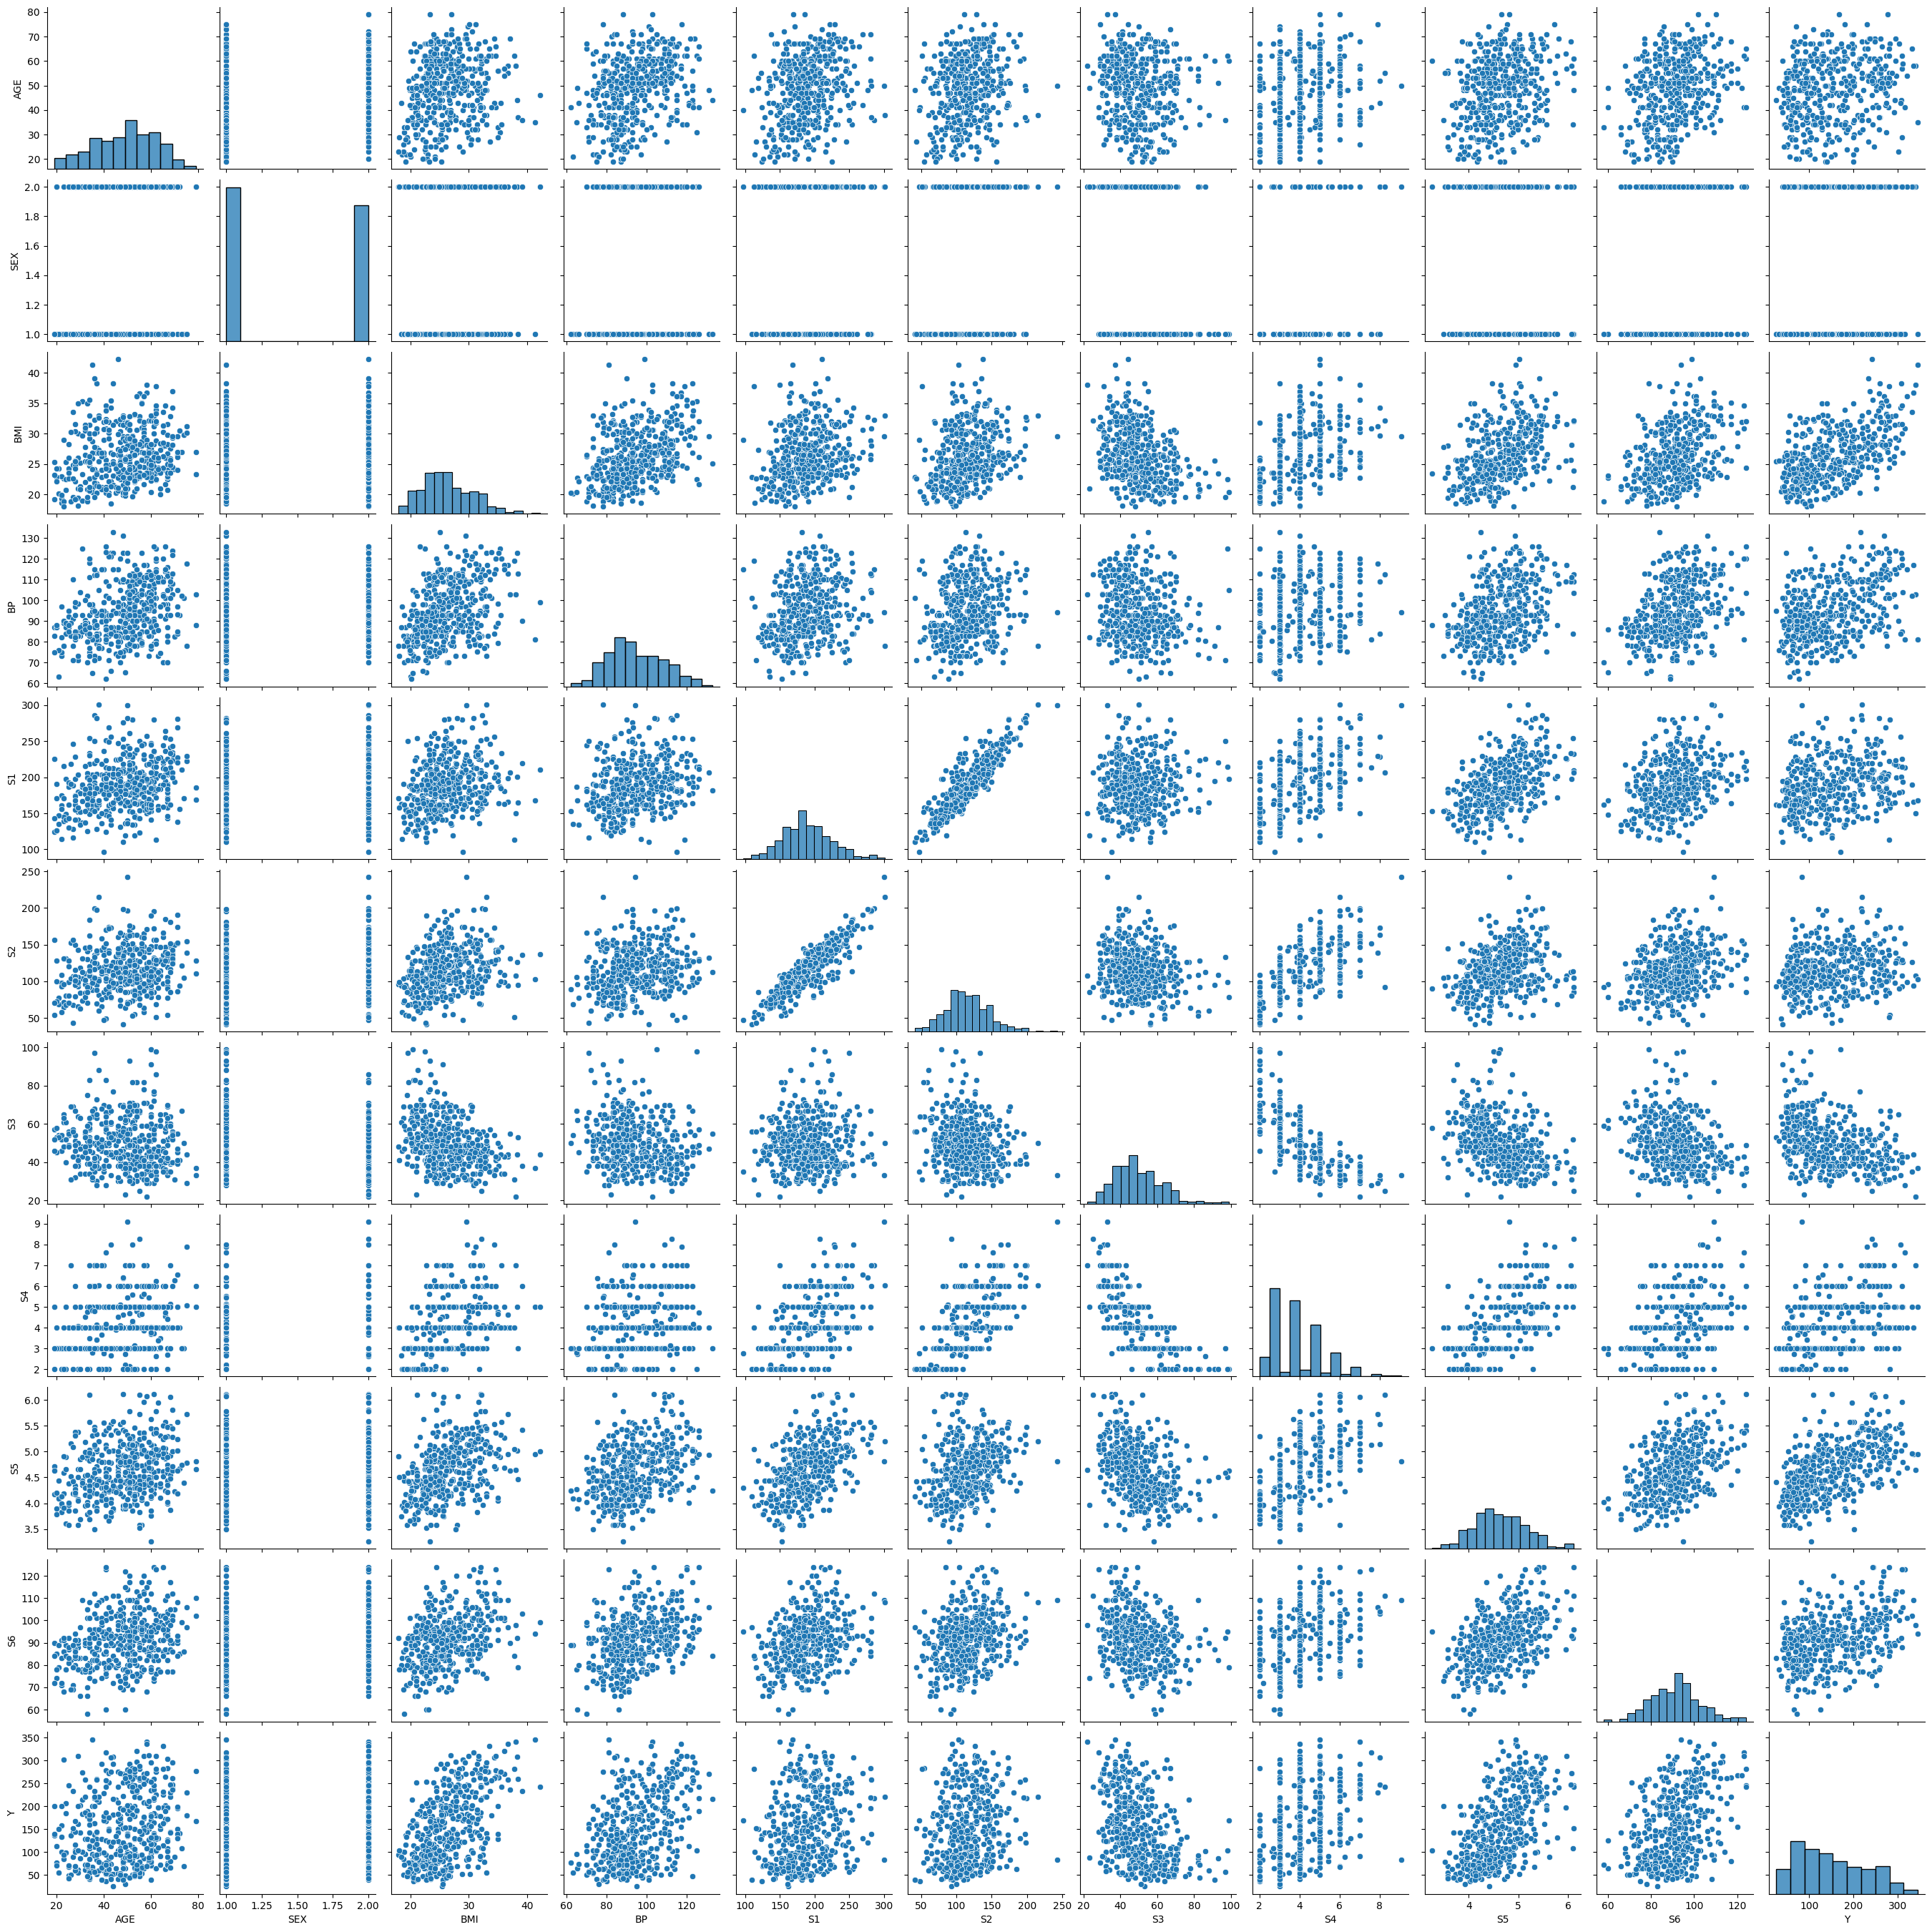

In [26]:
sns.pairplot(data)

### **Data Preprocessing:**

We can divide the data into train and test sets, scale features, and determine how to treat any missing values based on the EDA.

Removing data about illness progression one year after the baseline. dividing the dataset into two forms, `X` and `y`.

In [27]:
y = pd.DataFrame(data["Y"])
y.rename(columns={0: 'target'}, inplace=True)

In [28]:
X = data.drop(['Y', 'S1', 'S2', 'S3', 'S5'], axis=1)

Let's visualise the data now for easier comprehension. laying out the data that will be used to train the model. The features that we would employ are listed below...

Text(0, 0.5, 'Count')

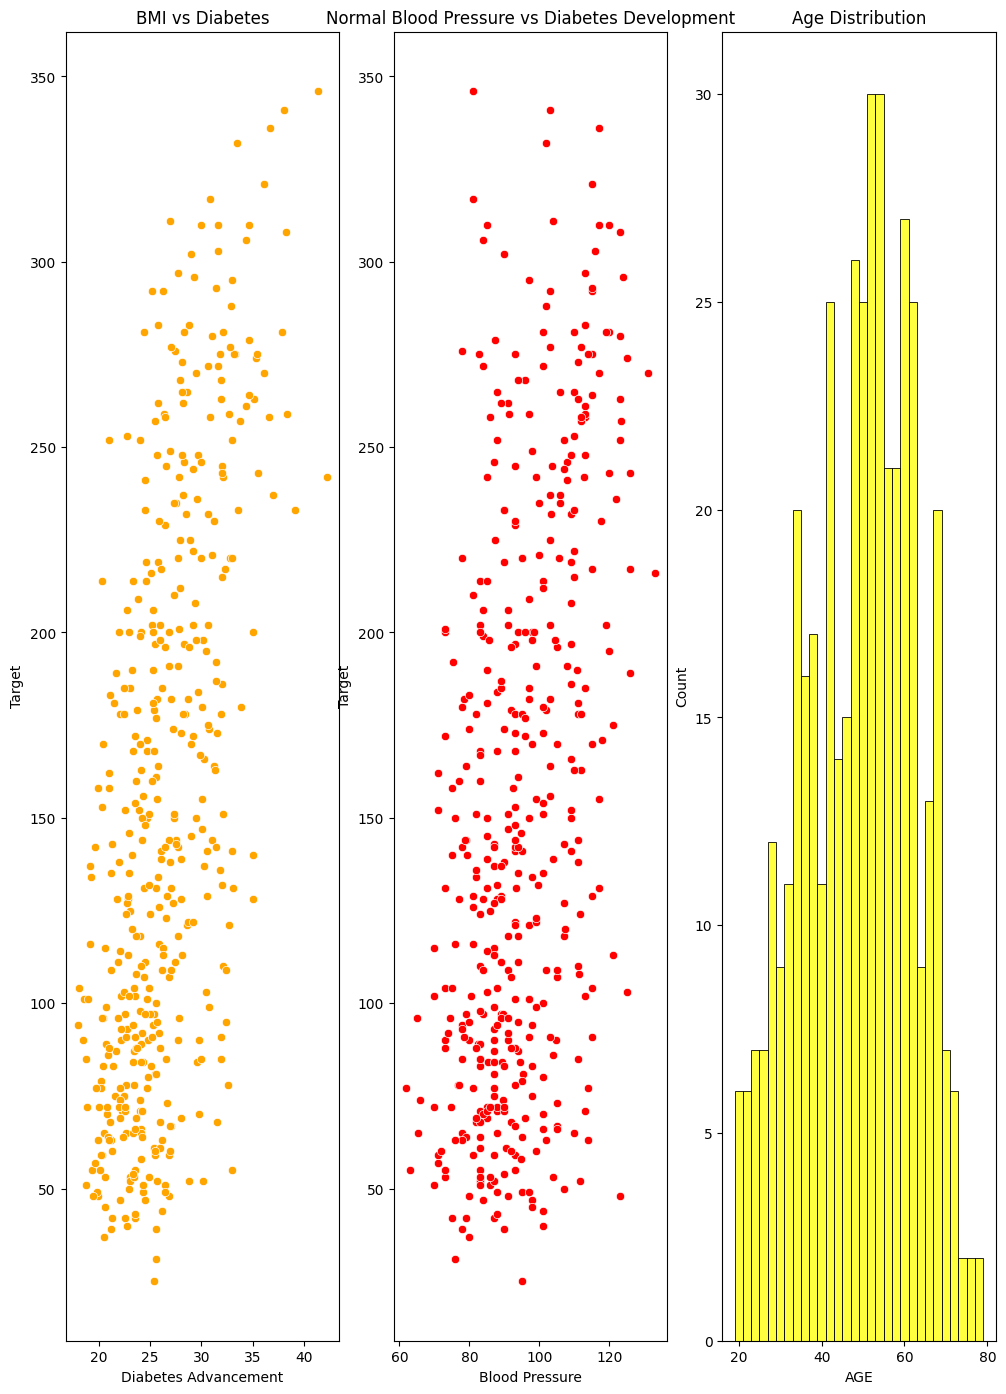

In [29]:
plt.figure(figsize=(12, 17))
plt.subplot(1,3,1)
sns.scatterplot(x=X["BMI"], y=y["Y"], color="orange")
plt.title('BMI vs Diabetes')
plt.xlabel('Diabetes Advancement')
plt.ylabel('Target')

plt.subplot(1,3,2)
sns.scatterplot(x=X["BP"], y=y["Y"], color="red")
plt.title('Normal Blood Pressure vs Diabetes Development')
plt.xlabel('Blood Pressure')
plt.ylabel('Target')

plt.subplot(1,3,3)
sns.histplot(x=X["AGE"], bins=30, color='yellow')
plt.title('Age Distribution')
plt.xlabel('AGE')
plt.ylabel('Count')

The dataset will now be divided into **Train, Test, and Validation** sets.

In [30]:
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size=0.7, test_size=0.3, random_state=10)

### **Modeling the Data:**

#### **1. Polynomial Regression**

In [31]:
degrees = [3,4]
ploynomial_models = []

for i in degrees:
    modelp = make_pipeline(PolynomialFeatures(i),LinearRegression())
    modelp.fit(X_train, y_train)
    ploynomial_models.append(modelp)

#### **2. Decision Trees**

In [32]:
depth_tree = [4, 5]
decision_tree_models = []

for j in depth_tree:
    modeldt = DecisionTreeRegressor(max_depth=j)
    modeldt.fit(X_train, y_train)
    decision_tree_models.append(modeldt)

#### **3. K-Nearest Neighbors (KNN)**

In [33]:
k_values = [7,9]
knn_models = []

for k in k_values:
    modelknn = KNeighborsRegressor(n_neighbors=k)
    modelknn.fit(X_train, y_train)
    knn_models.append(modelknn)

In [34]:
print(ploynomial_models)
print(decision_tree_models)
print(knn_models)

[Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())]), Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression', LinearRegression())])]
[DecisionTreeRegressor(max_depth=4), DecisionTreeRegressor(max_depth=5)]
[KNeighborsRegressor(n_neighbors=7), KNeighborsRegressor(n_neighbors=9)]


### **Cross-Validation:**

In [35]:
scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error']

poly_cv_results = []
for i in ploynomial_models:
    cv_scores = cross_validate(i, X_train, y_train, scoring=scoring, cv=5)
    poly_cv_results.append(cv_scores)

dt_cv_results = []
for j in decision_tree_models:
    cv_scores = cross_validate(j, X_train, y_train, scoring=scoring, cv=5)
    dt_cv_results.append(cv_scores)

knn_cv_results = []
for k in knn_models:
    cv_scores = cross_validate(k, X_train, y_train, scoring=scoring, cv=5)
    knn_cv_results.append(cv_scores)

In [36]:
print(poly_cv_results, "\n")
print(dt_cv_results, "\n")
print(knn_cv_results)

[{'fit_time': array([0.02029729, 0.0206852 , 0.01667356, 0.02103829, 0.01683736]), 'score_time': array([0.00418711, 0.00422883, 0.00393939, 0.00254178, 0.0053978 ]), 'test_r2': array([-0.5305108 , -6.27784392,  0.23424732,  0.21348425, -1.2148149 ]), 'test_neg_mean_absolute_error': array([ -69.12772154, -114.45685085,  -54.69063851,  -61.10516141,
        -70.43077681]), 'test_neg_mean_absolute_percentage_error': array([-0.58914006, -0.87183127, -0.48520776, -0.53521836, -0.55505497])}, {'fit_time': array([0.06517625, 0.09421372, 0.07852769, 0.09753084, 0.08794522]), 'score_time': array([0., 0., 0., 0., 0.]), 'test_r2': array([-84.66234993, -30.51169396,  -8.08203327,  -4.8437229 ,
       -11.14737854]), 'test_neg_mean_absolute_error': array([-333.82826819, -212.90915981, -150.96028612, -136.9841228 ,
       -150.39617218]), 'test_neg_mean_absolute_percentage_error': array([-2.17429116, -1.64354704, -1.14436482, -1.19039181, -1.0035844 ])}] 

[{'fit_time': array([0.00807691, 0.        

Create the table with these data now.

In [37]:
cv_poly_df = pd.DataFrame(poly_cv_results)
cv_dt_df = pd.DataFrame(dt_cv_results)
cv_knn_df = pd.DataFrame(knn_cv_results)
print(cv_poly_df.head())


                                            fit_time   
0  [0.02029728889465332, 0.020685195922851562, 0....  \
1  [0.06517624855041504, 0.09421372413635254, 0.0...   

                                          score_time   
0  [0.004187107086181641, 0.004228830337524414, 0...  \
1                          [0.0, 0.0, 0.0, 0.0, 0.0]   

                                             test_r2   
0  [-0.5305108000863776, -6.277843918272425, 0.23...  \
1  [-84.66234993266544, -30.51169396314803, -8.08...   

                        test_neg_mean_absolute_error   
0  [-69.12772154038952, -114.45685085173577, -54....  \
1  [-333.8282681910261, -212.9091598124754, -150....   

             test_neg_mean_absolute_percentage_error  
0  [-0.589140058086483, -0.8718312675140673, -0.4...  
1  [-2.1742911597963452, -1.643547044136295, -1.1...  


In [38]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(309, 6)
(133, 6)
(309, 1)
(133, 1)


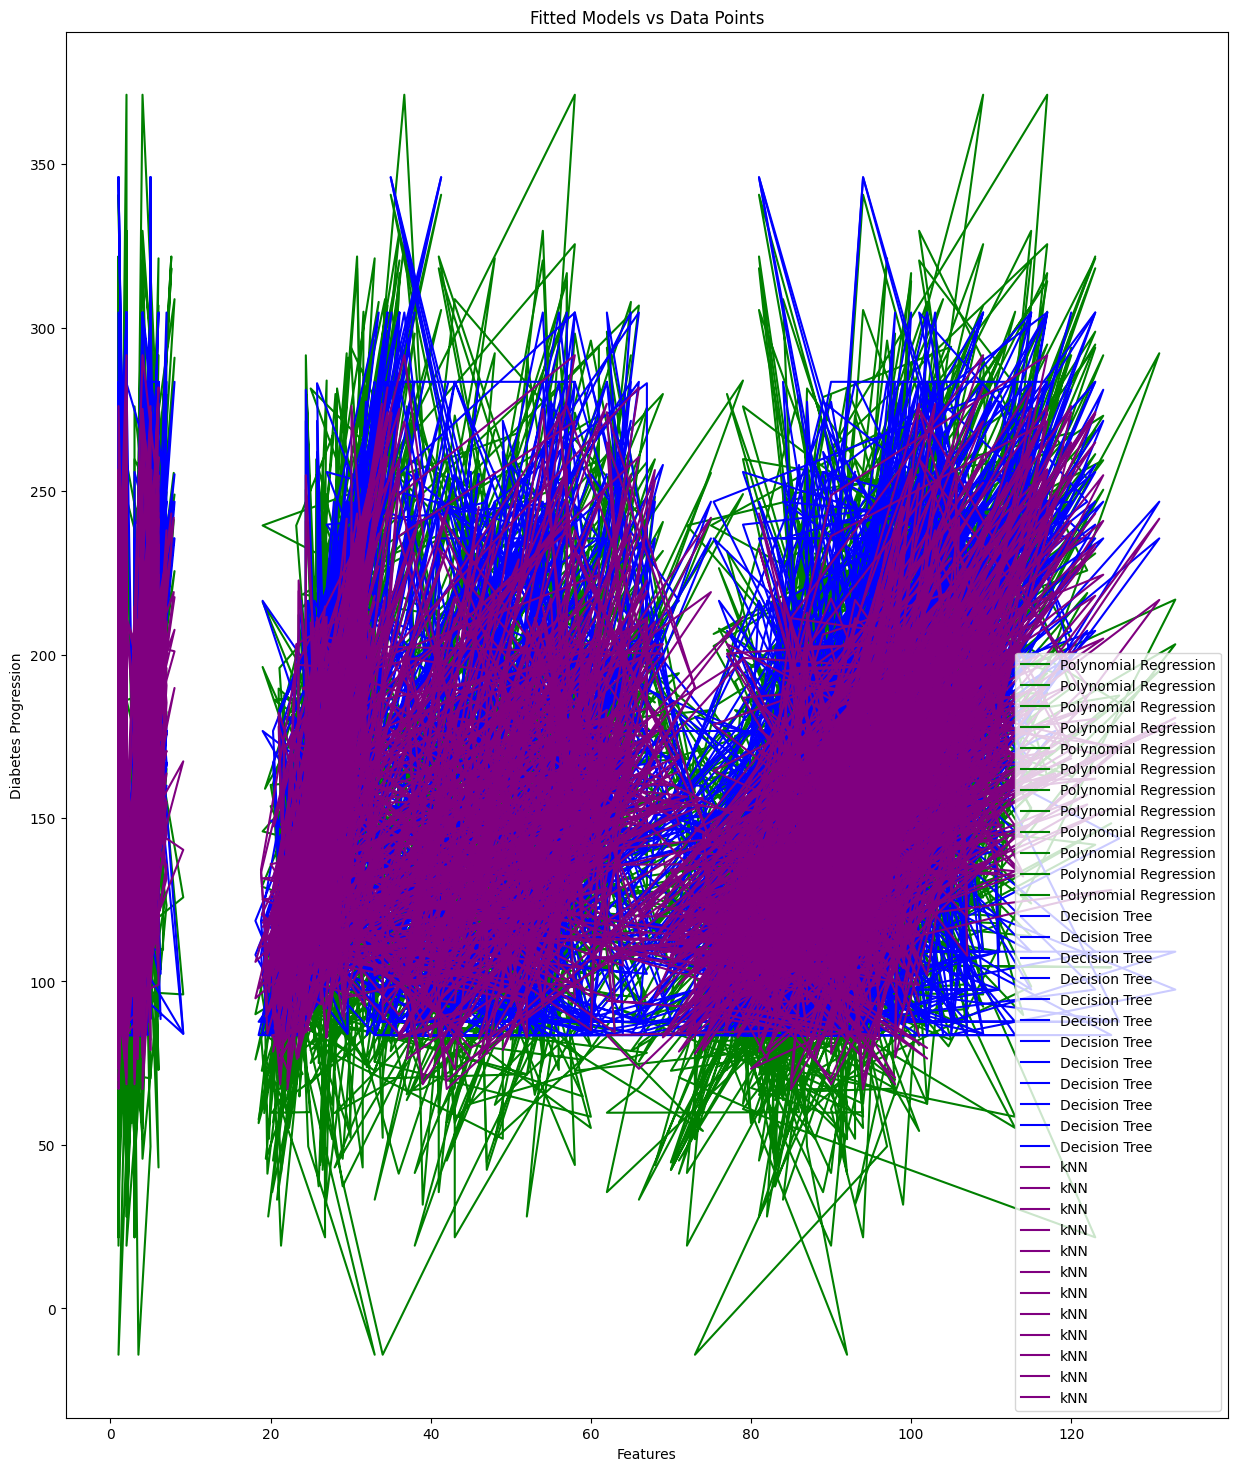

In [39]:
plt.figure(figsize=(15,18))

for i in ploynomial_models:
    plt.plot(X_train, i.predict(X_train), label='Polynomial Regression', color='green')

for j in decision_tree_models:
    plt.plot(X_train, j.predict(X_train), label='Decision Tree', color='blue')

for k in knn_models:
    plt.plot(X_train, k.predict(X_train), label='kNN', color='purple')

plt.xlabel('Features')
plt.ylabel('Diabetes Progression')
plt.title('Fitted Models vs Data Points')
plt.legend()
plt.show()
